# **Heart Attack Analysis Dataset**

This is notebook is for analysing the Heart Attack dataset in kaggle (https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)

## **Business**

Predict if a person is prone to a heart attack or not.

In [ ]:
try:
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  import seaborn as sns
  print('All Packages are installed.')
except:
  print("Packages are not installed.")

All Packages are installed.


## **Data**

* Age : Age of the patient
* Sex : Sex of the patient
* exang: exercise induced angina (1 = yes; 0 = no)
* ca: number of major vessels (0-3)
* cp : Chest Pain type chest pain type
    * Value 0: typical angina
    * Value 1: atypical angina
    * Value 2: non-anginal pain
    * Value 3: asymptomatic
* trtbps : resting blood pressure (in mm Hg)
* chol : cholestoral in mg/dl fetched via BMI sensor
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* rest_ecg : resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach : maximum heart rate achieved
* target : 0= less chance of heart attack 1= more chance of heart attack

In [ ]:
# import data
try:
  file_name = 'heart.csv'
  df  = pd.read_csv(file_name)
except:
  print('Data is not imported.')

In [ ]:
print("The shape of the dataset is : ", df.shape)

The shape of the dataset is :  (303, 14)


In [ ]:
# show data
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# missing value check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


* There isn't missing value.

In [ ]:
# numeric and categorical data check 
dict ={}

for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict, index=['unique count']).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [ ]:
categorical_columns = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
numeric_columns = ['age','trtbps','chol','thalachh','oldpeak']
target_column = ['output']
print("The categorial cols are : ", categorical_columns)
print("The numeric cols are : ", numeric_columns)
print("The target variable is :  ", target_column)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The numeric cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


In [ ]:
df[numeric_columns].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


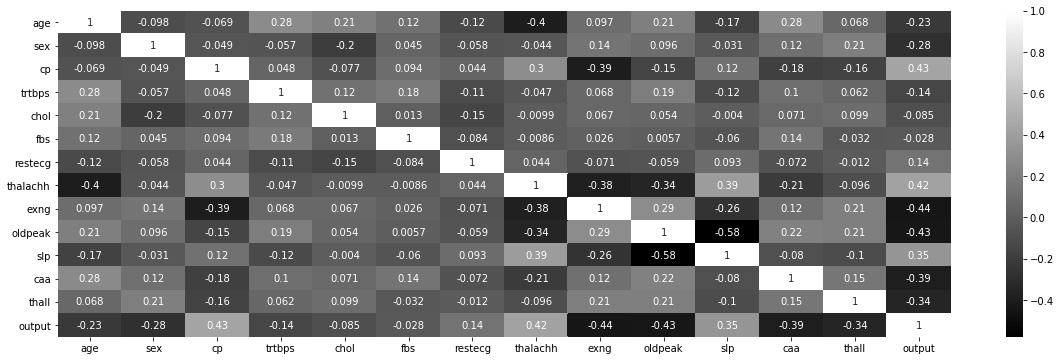

In [ ]:
# plot correlation matrix 
# showing correlation coefficients between variables.
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(),annot=True,cmap="gray")

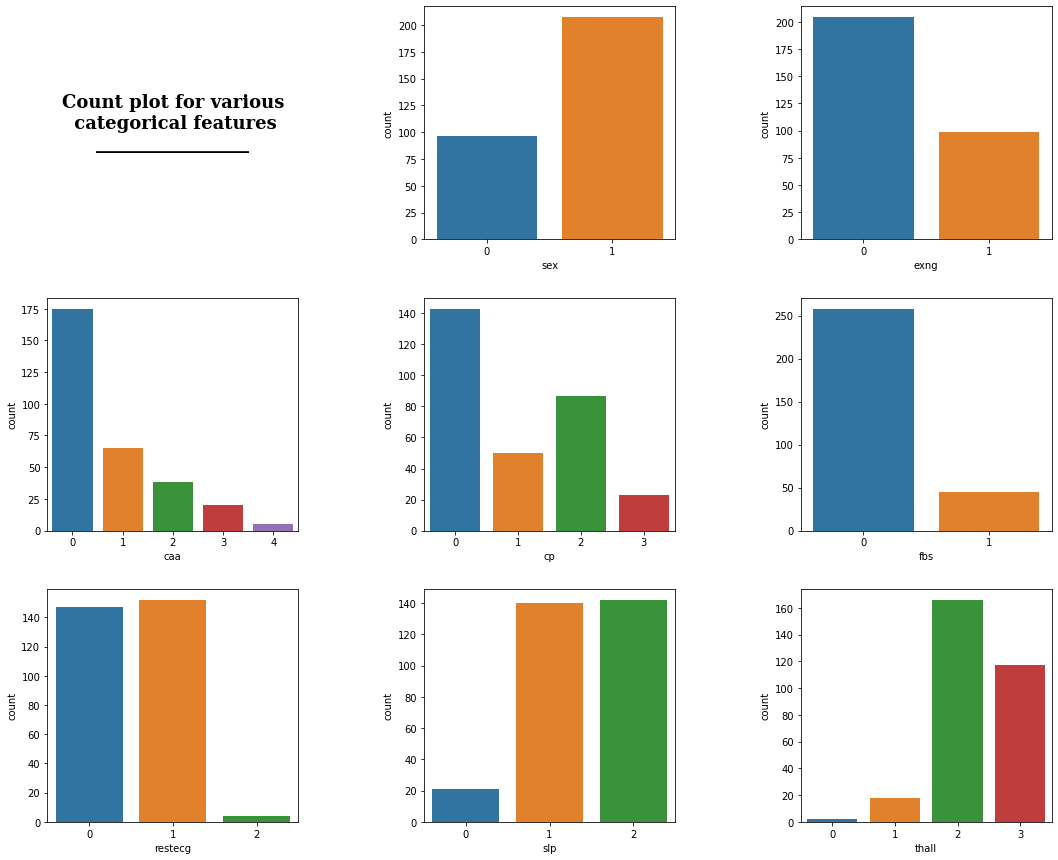

In [ ]:
# Count plot for various categorical features
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

sns.countplot(ax=ax1,data=df,x='sex')
sns.countplot(ax=ax2,data=df,x='exng')
sns.countplot(ax=ax3,data=df,x='caa')
sns.countplot(ax=ax4,data=df,x='cp')
sns.countplot(ax=ax5,data=df,x='fbs')
sns.countplot(ax=ax6,data=df,x='restecg')
sns.countplot(ax=ax7,data=df,x='slp')
sns.countplot(ax=ax8,data=df,x='thall')

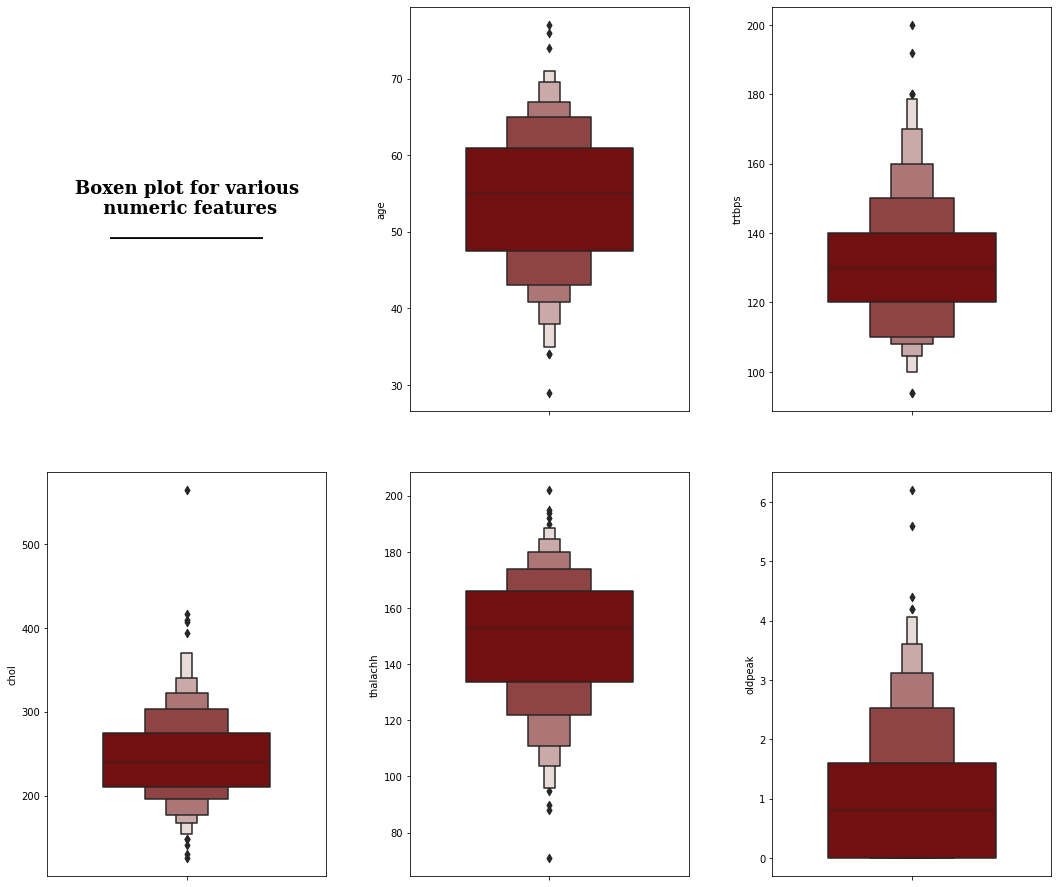

In [ ]:
# Boxen plot for various numeric features
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Boxen plot for various\n numeric features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

sns.boxenplot(ax=ax1,y=df['age'],palette=["#800000"],width=0.6)
sns.boxenplot(ax=ax2,y=df['trtbps'],palette=["#800000"],width=0.6)
sns.boxenplot(ax=ax3,y=df['chol'],palette=["#800000"],width=0.6)
sns.boxenplot(ax=ax4,y=df['thalachh'],palette=["#800000"],width=0.6)
sns.boxenplot(ax=ax5,y=df['oldpeak'],palette=["#800000"],width=0.6)

* All Numeric Column has outliers.

Text(0, 0.5, '')

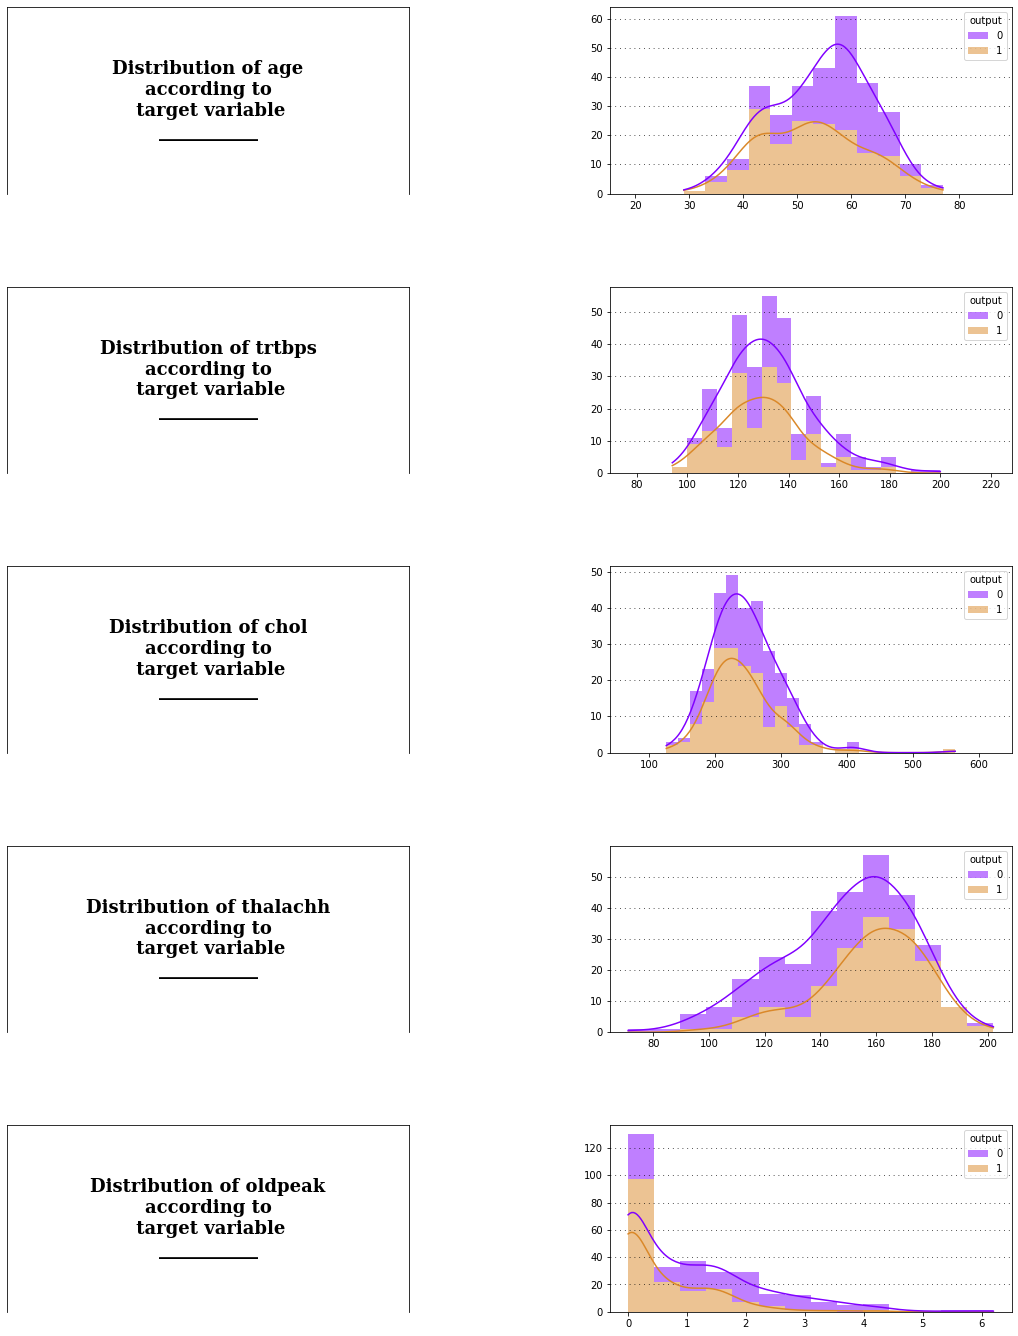

In [ ]:
# distribution of numeric features according to target variable
fig = plt.figure(figsize=(18,24))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])


# Age title
ax0.text(0.5,0.5,"Distribution of age\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='age',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
sns.histplot(ax=ax1, data=df,  x='age',hue="output", kde=True, multiple='stack',palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# TrTbps title
ax2.text(0.5,0.5,"Distribution of trtbps\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# TrTbps
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='trtbps',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
sns.histplot(ax=ax3, data=df,  x='trtbps',hue="output", kde=True, multiple='stack',palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Chol title
ax4.text(0.5,0.5,"Distribution of chol\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Chol
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df, x='chol',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
sns.histplot(ax=ax5, data=df,  x='chol',hue="output", kde=True, multiple='stack',palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thalachh title
ax6.text(0.5,0.5,"Distribution of thalachh\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thalachh
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax7, data=df,  x='thalachh',hue="output", kde=True, multiple='stack',palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Oldpeak title
ax8.text(0.5,0.5,"Distribution of oldpeak\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Oldpeak
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax9, data=df,  x='oldpeak',hue="output", kde=True, multiple='stack',palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

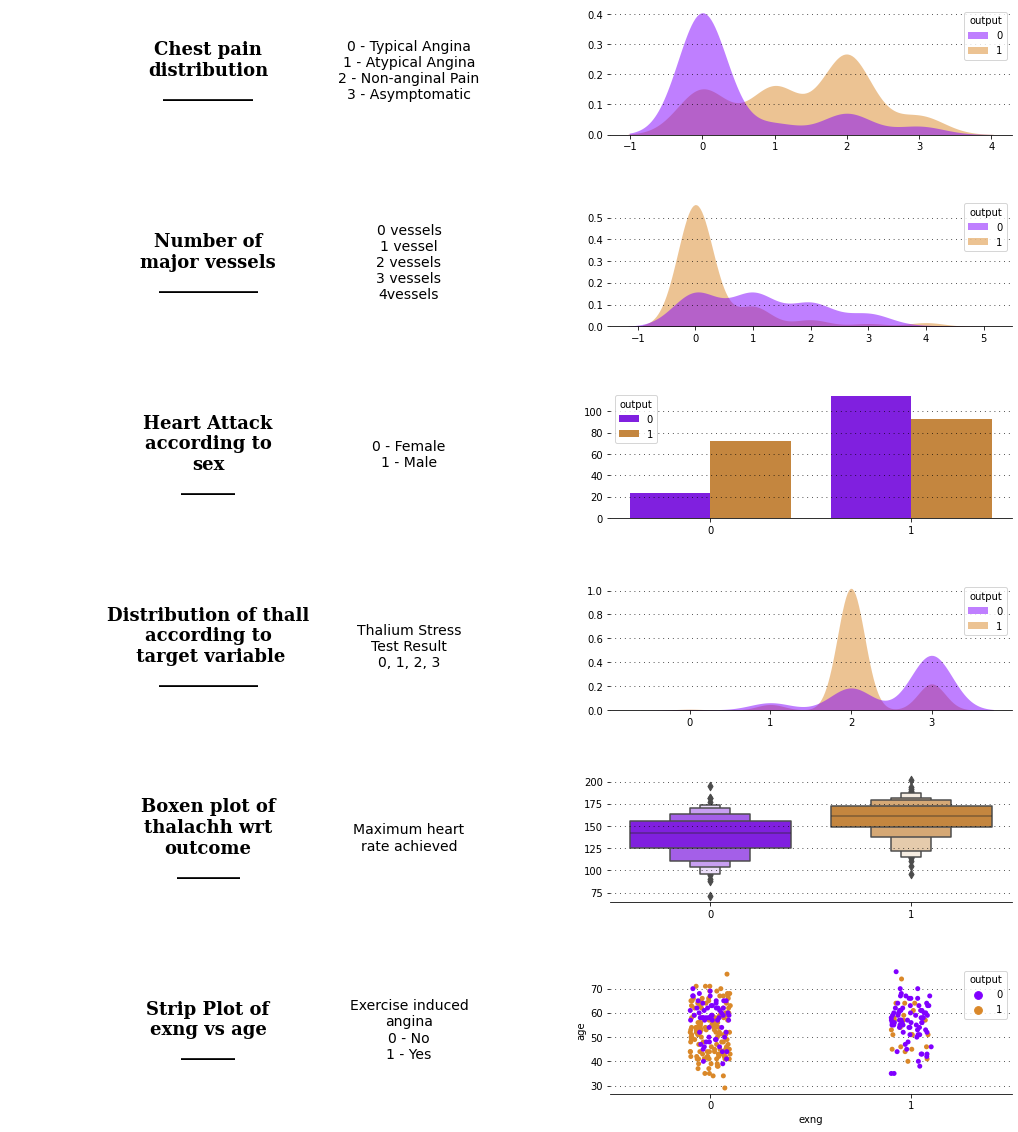

In [ ]:
fig = plt.figure(figsize=(18,20))
gs = fig.add_gridspec(6,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
ax10 = fig.add_subplot(gs[5,0])
ax11 = fig.add_subplot(gs[5,1])



# Cp title
# 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
ax0.text(0.5,0.5,"Chest pain\ndistribution\n__________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.text(1,.5,"0 - Typical Angina\n1 - Atypical Angina\n2 - Non-anginal Pain\n3 - Asymptomatic",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

# Cp
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='cp',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Caa title
ax2.text(0.5,0.5,"Number of\nmajor vessels\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.text(1,.5,"0 vessels\n1 vessel\n2 vessels\n3 vessels\n4vessels",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# Caa
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='caa',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Sex title
ax4.text(0.5,0.5,"Heart Attack\naccording to\nsex\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.text(1,.5,"0 - Female\n1 - Male",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Sex
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='sex',palette=["#8000ff","#da8829"], hue='output')
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thall title
ax6.text(0.5,0.5,"Distribution of thall\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.text(1,.5,"Thalium Stress\nTest Result\n0, 1, 2, 3",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thall
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='thall',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thalachh title
ax8.text(0.5,0.5,"Boxen plot of\nthalachh wrt\noutcome\n_______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.text(1,.5,"Maximum heart\nrate achieved",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Thalachh
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax9, data=df,x='output',y='thalachh',palette=["#8000ff","#da8829"])
ax9.set_xlabel("")
ax9.set_ylabel("")



# Exng title
ax10.text(0.5,0.5,"Strip Plot of\nexng vs age\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax10.text(1,.5,"Exercise induced\nangina\n0 - No\n1 - Yes",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax10.spines["bottom"].set_visible(False)
ax10.set_xticklabels([])
ax10.set_yticklabels([])
ax10.tick_params(left=False, bottom=False)


# Exng
ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.stripplot(ax=ax11, data=df,x='exng',y='age',hue='output',palette=["#8000ff","#da8829"])
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)
    ax10.spines[i].set_visible(False)
    ax11.spines[i].set_visible(False)

In [ ]:
def Age_transformation(df):
    '''
    INPUT: Numeric Age Column
    OUTPUT: Categorical Age Column
    
    DESC: Divides it into groups of 10 from the minimum age to the maximum age.
    '''
    
    min_age = round(df.min()/5)*5
    max_age = df.max()
    L =[i for i in range(min_age,max_age+5,10)]
    
    for i in range(len(df)):
        for j in L:
            if df[i]<j:
                df[i] = str(j-10) + '-' + str(j)
                break    
    return df

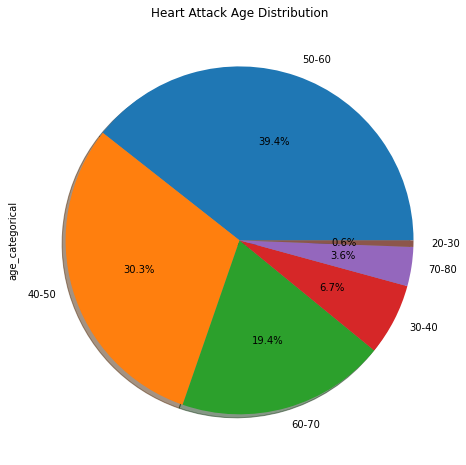

In [ ]:
df1 = df.copy()
df1['age_categorical'] = Age_transformation(df.loc[:,('age')].copy())

age_hist = df1[df1['output']==1].age_categorical.value_counts(normalize = True)

df_age_hist =pd.DataFrame(age_hist)

plot = df_age_hist.plot.pie(y='age_categorical',figsize=(8,8), title="Heart Attack Age Distribution", \
                   legend=False, autopct='%1.1f%%', \
                   shadow=True, startangle=0)

In [ ]:
s = 0 
for i in range(len(df)):
    if df.loc[i,('age')]>=40 and df.loc[i,('age')]<70:
        s+=1

rate  = round(100*s/len(df),2)
"{}% of people who have had a heart attack are between the ages of 40-70.".format(rate)

'91.42% of people who have had a heart attack are between the ages of 40-70.'

In [ ]:
result = df[df['output']==1].sex.value_counts()/df.sex.value_counts()
"Although the sex = 0 is less than the sex = 1, the probability of having a heart attack is {}% for sex = 1, while it is {}% for sex = 0.".format(round(result[1],2)*100,round(result[0],2)*100)

'Although the sex = 0 is less than the sex = 1, the probability of having a heart attack is 45.0% for sex = 1, while it is 75.0% for sex = 0.'

## Conclusion

* There is no missing value.
* All Numeric Column has outliers.
* sex = 0 is 30% more likely to have a heart attack than sex = 1.
* There is no apparent linear correlation between continuous variable according to the heatmap.
* Heatmap matrix suggests that there might be some correlation between output and cp, thalachh and slp.
* Although older people seem to have more heart attacks, no such relationship was observed between the variables.
* According to the distribution plot of thalachh output, people with higher maximum heart rate achieved have higher chances of heart attack.
* According to the distribution plot of oldpeak output, people with lower pevious peak achieved have higher chances of heart attack.
* People with Non-Anginal chest pain, that is with cp = 2 have higher chances of heart attack.
* People with 0 major vessels, that is with caa = 0 have high chance of heart attack.
* People with sex = 1 have higher chance of heart attack.
* People with thall = 2 have much higher chance of heart attack.
* People with no exercise induced angina, that is with exng = 0 have higher chance of heart attack.

## **Data Preprocessing**


In [ ]:
try:
  from sklearn.preprocessing import StandardScaler
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import accuracy_score
  from sklearn.linear_model import LogisticRegression
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.svm import SVC
  from sklearn.naive_bayes import GaussianNB
  from sklearn.tree import DecisionTreeClassifier
  print("All Packages are installed.")
except:
  print("Packages are not installed.")

All Packages are installed.


In [ ]:
df1 = df
# one hot encoding
df1 = pd.get_dummies(df1, columns = categorical_columns, prefix=categorical_columns, prefix_sep='_', drop_first=True, dummy_na=False)

X = df1.drop(['output'],axis=1)
y = df1[['output']]

scaler = StandardScaler()

X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (242, 22)
The shape of X_test is        (61, 22)
The shape of y_train is       (242, 1)
The shape of y_test is        (61, 1)


## **Model**

In [ ]:
#Logistic Regression Model
logr = LogisticRegression(random_state=0)
logr.fit(X_train,y_train.values.ravel())

y_pred = logr.predict(X_test)

acc = accuracy_score(y_test,y_pred)
print("Logistic Regression Model Accuracy Score: {}\n".format(acc))


#KNN Model
knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knn.fit(X_train,y_train.values.ravel())

y_pred = knn.predict(X_test)

acc = accuracy_score(y_test,y_pred)
print("KNN Model Accuracy Score: {}\n".format(acc))


#SVC Model
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train.values.ravel())

y_pred = svc.predict(X_test)

acc = accuracy_score(y_test,y_pred)
print("SVC Model Accuracy Score: {}\n".format(acc))


#GaussianNB Model
gnb = GaussianNB()
gnb.fit(X_train, y_train.values.ravel())

y_pred = gnb.predict(X_test)

acc = accuracy_score(y_test,y_pred)
print("GaussianNB Model Accuracy Score: {}\n".format(acc))


#Decision Tree Model
dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc.fit(X_train,y_train.values.ravel())

y_pred = dtc.predict(X_test)

acc = accuracy_score(y_test,y_pred)
print("Decision Tree Model Accuracy Score: {}\n".format(acc))

Logistic Regression Model Accuracy Score: 0.9016393442622951

KNN Model Accuracy Score: 0.819672131147541

SVC Model Accuracy Score: 0.8688524590163934

GaussianNB Model Accuracy Score: 0.6557377049180327

Decision Tree Model Accuracy Score: 0.7540983606557377

